In [1]:
# importing some useful packages
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np 
import cv2
%matplotlib inline

This image is:  <class 'numpy.ndarray'> with dimensions:  (540, 960, 3)


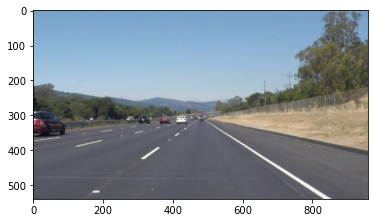

In [2]:
image = mpimg.imread('test_images/solidWhiteRight.jpg')
print("This image is: ", type(image), "with dimensions: ", image.shape)
plt.imshow(image)

In [11]:
import math 

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def canny(img,low_threshold, high_threshold):
    """This will apply the canny edge detection"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
    
def region_of_interest(img,vertices):
    """
    Applies an image mask.
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    `vertices` should be a numpy array of integer points.
    """
    # define a blank mask
    mask = np.zeros_like(img)
    # fill the mask 
    if len(img.shape) >2:
        channel_output = img.shape[2]
        ignore_mask_color = (255,) * channel_output
    else:
        ignore_mask_color = 255
    
    #filling pixels inside the polygon defined by "vertices" with 255: the fill color
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img,(x1,y1),(x2,y2),color,thickness)
            
def hough_lines(img, rho,theta,threshold,min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0],img.shape[1],3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    return cv2.addWeighted(initial_img, α, img, β, γ)

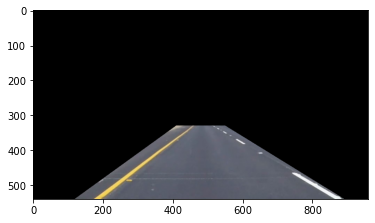

In [28]:
test = mpimg.imread('test_images/whiteCarLaneSwitch.jpg')

result = region_of_interest(test, np.array([[(120,539),(410,330),(550,330),(890,539)]]))

plt.imshow(result)

In [12]:
#Build the pipeline
def lane_detection(image):
    gray = grayscale(image)
    gaussian_img = gaussian_blur(gray,3)
    edge_img = canny(gaussian_img,50,100)
    clip_img = region_of_interest(edge_img,np.array([[(120,539),(410,330),(550,330),(890,539)]], dtype=np.int32))
    hough_img = hough_lines(clip_img, rho=2, theta=np.pi/180, threshold=20, min_line_len=50, max_line_gap=80)
    result = weighted_img(hough_img, image, α=0.8, β=1., γ=0.)
    plt.imshow(result)
    
    return result

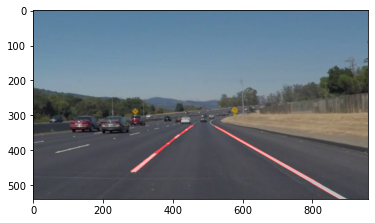

In [13]:
import os 
testFiles = os.listdir("test_images/")
idx = 0
img = mpimg.imread("test_images/"+testFiles[idx])
final = lane_detection(img)

In [16]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [17]:
def process_image(image):
    result = lane_detection(image)
    return result 

t:   5%|▌         | 12/221 [00:00<00:01, 119.67it/s, now=None]

Moviepy - Building video test_videos_output/solidWhiteRight.mp4.
Moviepy - Writing video test_videos_output/solidWhiteRight.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/solidWhiteRight.mp4
CPU times: user 5.97 s, sys: 1.19 s, total: 7.16 s
Wall time: 2.48 s


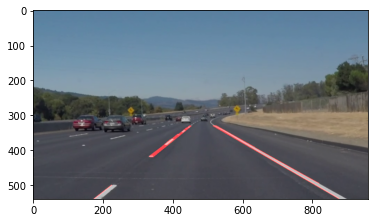

In [19]:
white_output = 'test_videos_output/solidWhiteRight.mp4'
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

In [20]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

t:   2%|▏         | 12/681 [00:00<00:05, 118.92it/s, now=None]

Moviepy - Building video test_videos_output/solidYellowLeft.mp4.
Moviepy - Writing video test_videos_output/solidYellowLeft.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/solidYellowLeft.mp4
CPU times: user 18.8 s, sys: 4.35 s, total: 23.1 s
Wall time: 7.71 s


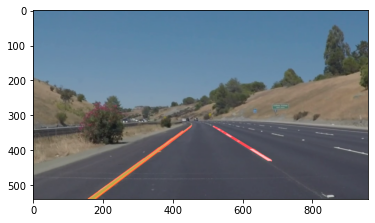

In [21]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

In [22]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))